In [161]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [10]:
tup = tf.keras.datasets.boston_housing.load_data(
    path="boston_housing.npz", test_split=0.2, seed=113
)

In [29]:
first_part = tup[0]
second_part = tup[1]

In [31]:
x_train = first_part[0]
y_train = first_part[1]
x_test = second_part[0]
y_test = second_part[1]

In [35]:
x_train.shape, y_train.shape

((404, 13), (404,))

In [36]:
x_test.shape, y_test.shape

((102, 13), (102,))

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_norm = scaler.fit_transform(x_train)
x_test_norm = scaler.fit_transform(x_test)

In [219]:
model = keras.Sequential()
model.add(layers.Dense(100, activation='sigmoid', input_shape=[x_train.shape[1]]))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(100, activation='swish'))
model.add(layers.Dense(1, activation='linear'))
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.001), loss='mse', 
              metrics=[tf.keras.metrics.RootMeanSquaredError()])
model.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_152 (Dense)            (None, 100)               1400      
_________________________________________________________________
dense_153 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_154 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_155 (Dense)            (None, 1)                 101       
Total params: 21,701
Trainable params: 21,701
Non-trainable params: 0
_________________________________________________________________


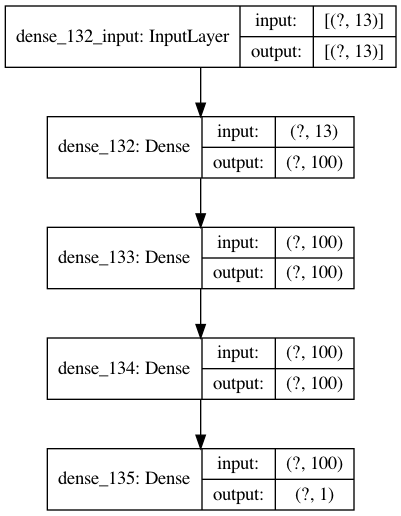

In [198]:
keras.utils.plot_model(model, show_shapes=True)

In [78]:
inputs = keras.Input(shape=x_train.shape[1])
x = layers.Dense(8, activation='relu')(inputs)
#x = layers.Dropout(0.5)(x)
x = layers.Dense(16, activation='swish')(x)
#x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation='linear')(x)


model = keras.Model(inputs, outputs)
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=0.002),
    loss="mse",
    metrics="mae",
)
model.summary()

Model: "functional_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 13)]              0         
_________________________________________________________________
dense_27 (Dense)             (None, 8)                 112       
_________________________________________________________________
dense_28 (Dense)             (None, 16)                144       
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 17        
Total params: 273
Trainable params: 273
Non-trainable params: 0
_________________________________________________________________


In [220]:
history = model.fit(
    x_train_norm, y_train,
    validation_data=(x_test_norm, y_test),
    batch_size=32,
    #validation_split=0.2,
    callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=100)],
    epochs=1000
)

Epoch 1/1000
13/13 [==============================] - 0s 11ms/step - loss: 367.9346 - root_mean_squared_error: 19.1816 - val_loss: 141.5820 - val_root_mean_squared_error: 11.8988
Epoch 2/1000
13/13 [==============================] - 0s 4ms/step - loss: 82.4232 - root_mean_squared_error: 9.0787 - val_loss: 59.8599 - val_root_mean_squared_error: 7.7369
Epoch 3/1000
13/13 [==============================] - 0s 4ms/step - loss: 59.4183 - root_mean_squared_error: 7.7083 - val_loss: 50.4992 - val_root_mean_squared_error: 7.1063
Epoch 4/1000
13/13 [==============================] - 0s 4ms/step - loss: 52.2671 - root_mean_squared_error: 7.2296 - val_loss: 45.5347 - val_root_mean_squared_error: 6.7479
Epoch 5/1000
13/13 [==============================] - 0s 4ms/step - loss: 48.5322 - root_mean_squared_error: 6.9665 - val_loss: 38.0381 - val_root_mean_squared_error: 6.1675
Epoch 6/1000
13/13 [==============================] - 0s 4ms/step - loss: 44.6735 - root_mean_squared_error: 6.6838 - val_los

Epoch 48/1000
13/13 [==============================] - 0s 4ms/step - loss: 15.1306 - root_mean_squared_error: 3.8898 - val_loss: 21.1199 - val_root_mean_squared_error: 4.5956
Epoch 49/1000
13/13 [==============================] - 0s 3ms/step - loss: 14.0444 - root_mean_squared_error: 3.7476 - val_loss: 28.5993 - val_root_mean_squared_error: 5.3478
Epoch 50/1000
13/13 [==============================] - 0s 3ms/step - loss: 15.1063 - root_mean_squared_error: 3.8867 - val_loss: 21.1607 - val_root_mean_squared_error: 4.6001
Epoch 51/1000
13/13 [==============================] - 0s 4ms/step - loss: 12.8245 - root_mean_squared_error: 3.5811 - val_loss: 19.7702 - val_root_mean_squared_error: 4.4464
Epoch 52/1000
13/13 [==============================] - 0s 3ms/step - loss: 12.5303 - root_mean_squared_error: 3.5398 - val_loss: 19.5406 - val_root_mean_squared_error: 4.4205
Epoch 53/1000
13/13 [==============================] - 0s 3ms/step - loss: 14.6816 - root_mean_squared_error: 3.8317 - val_lo

Epoch 95/1000
13/13 [==============================] - 0s 4ms/step - loss: 9.6572 - root_mean_squared_error: 3.1076 - val_loss: 19.4777 - val_root_mean_squared_error: 4.4134
Epoch 96/1000
13/13 [==============================] - 0s 3ms/step - loss: 10.9212 - root_mean_squared_error: 3.3047 - val_loss: 19.4902 - val_root_mean_squared_error: 4.4148
Epoch 97/1000
13/13 [==============================] - 0s 4ms/step - loss: 10.5605 - root_mean_squared_error: 3.2497 - val_loss: 20.1434 - val_root_mean_squared_error: 4.4881
Epoch 98/1000
13/13 [==============================] - 0s 4ms/step - loss: 10.7500 - root_mean_squared_error: 3.2787 - val_loss: 18.7198 - val_root_mean_squared_error: 4.3266
Epoch 99/1000
13/13 [==============================] - 0s 4ms/step - loss: 8.5291 - root_mean_squared_error: 2.9205 - val_loss: 18.5793 - val_root_mean_squared_error: 4.3104
Epoch 100/1000
13/13 [==============================] - 0s 4ms/step - loss: 10.0365 - root_mean_squared_error: 3.1680 - val_los

Epoch 142/1000
13/13 [==============================] - 0s 3ms/step - loss: 7.7992 - root_mean_squared_error: 2.7927 - val_loss: 14.7669 - val_root_mean_squared_error: 3.8428
Epoch 143/1000
13/13 [==============================] - 0s 4ms/step - loss: 8.6795 - root_mean_squared_error: 2.9461 - val_loss: 18.3592 - val_root_mean_squared_error: 4.2848
Epoch 144/1000
13/13 [==============================] - 0s 4ms/step - loss: 7.9583 - root_mean_squared_error: 2.8211 - val_loss: 17.7964 - val_root_mean_squared_error: 4.2186
Epoch 145/1000
13/13 [==============================] - 0s 4ms/step - loss: 7.3745 - root_mean_squared_error: 2.7156 - val_loss: 15.3477 - val_root_mean_squared_error: 3.9176
Epoch 146/1000
13/13 [==============================] - 0s 4ms/step - loss: 9.4896 - root_mean_squared_error: 3.0805 - val_loss: 17.7150 - val_root_mean_squared_error: 4.2089
Epoch 147/1000
13/13 [==============================] - 0s 3ms/step - loss: 6.9231 - root_mean_squared_error: 2.6312 - val_lo

Epoch 189/1000
13/13 [==============================] - 0s 4ms/step - loss: 6.1322 - root_mean_squared_error: 2.4763 - val_loss: 19.3392 - val_root_mean_squared_error: 4.3976
Epoch 190/1000
13/13 [==============================] - 0s 4ms/step - loss: 6.5562 - root_mean_squared_error: 2.5605 - val_loss: 14.6659 - val_root_mean_squared_error: 3.8296
Epoch 191/1000
13/13 [==============================] - 0s 4ms/step - loss: 7.5762 - root_mean_squared_error: 2.7525 - val_loss: 12.9002 - val_root_mean_squared_error: 3.5917
Epoch 192/1000
13/13 [==============================] - 0s 4ms/step - loss: 7.0691 - root_mean_squared_error: 2.6588 - val_loss: 13.8143 - val_root_mean_squared_error: 3.7168
Epoch 193/1000
13/13 [==============================] - 0s 4ms/step - loss: 6.9625 - root_mean_squared_error: 2.6387 - val_loss: 14.2309 - val_root_mean_squared_error: 3.7724
Epoch 194/1000
13/13 [==============================] - 0s 4ms/step - loss: 7.2866 - root_mean_squared_error: 2.6994 - val_lo

Epoch 236/1000
13/13 [==============================] - 0s 4ms/step - loss: 5.6019 - root_mean_squared_error: 2.3668 - val_loss: 11.0225 - val_root_mean_squared_error: 3.3200
Epoch 237/1000
13/13 [==============================] - 0s 4ms/step - loss: 6.0395 - root_mean_squared_error: 2.4575 - val_loss: 11.7161 - val_root_mean_squared_error: 3.4229
Epoch 238/1000
13/13 [==============================] - 0s 4ms/step - loss: 5.2235 - root_mean_squared_error: 2.2855 - val_loss: 10.5545 - val_root_mean_squared_error: 3.2488
Epoch 239/1000
13/13 [==============================] - 0s 3ms/step - loss: 5.9119 - root_mean_squared_error: 2.4314 - val_loss: 12.4648 - val_root_mean_squared_error: 3.5305
Epoch 240/1000
13/13 [==============================] - 0s 4ms/step - loss: 5.8796 - root_mean_squared_error: 2.4248 - val_loss: 11.6467 - val_root_mean_squared_error: 3.4127
Epoch 241/1000
13/13 [==============================] - 0s 4ms/step - loss: 6.0007 - root_mean_squared_error: 2.4496 - val_lo

Epoch 283/1000
13/13 [==============================] - 0s 3ms/step - loss: 5.3699 - root_mean_squared_error: 2.3173 - val_loss: 10.4533 - val_root_mean_squared_error: 3.2332
Epoch 284/1000
13/13 [==============================] - 0s 4ms/step - loss: 5.0449 - root_mean_squared_error: 2.2461 - val_loss: 13.1783 - val_root_mean_squared_error: 3.6302
Epoch 285/1000
13/13 [==============================] - 0s 4ms/step - loss: 5.5229 - root_mean_squared_error: 2.3501 - val_loss: 13.0832 - val_root_mean_squared_error: 3.6171
Epoch 286/1000
13/13 [==============================] - 0s 4ms/step - loss: 5.3266 - root_mean_squared_error: 2.3079 - val_loss: 11.0576 - val_root_mean_squared_error: 3.3253
Epoch 287/1000
13/13 [==============================] - 0s 4ms/step - loss: 4.9467 - root_mean_squared_error: 2.2241 - val_loss: 12.6211 - val_root_mean_squared_error: 3.5526
Epoch 288/1000
13/13 [==============================] - 0s 4ms/step - loss: 5.4317 - root_mean_squared_error: 2.3306 - val_lo

Epoch 330/1000
13/13 [==============================] - 0s 4ms/step - loss: 4.8962 - root_mean_squared_error: 2.2127 - val_loss: 13.7078 - val_root_mean_squared_error: 3.7024
Epoch 331/1000
13/13 [==============================] - 0s 3ms/step - loss: 4.6915 - root_mean_squared_error: 2.1660 - val_loss: 9.2009 - val_root_mean_squared_error: 3.0333
Epoch 332/1000
13/13 [==============================] - 0s 3ms/step - loss: 4.7951 - root_mean_squared_error: 2.1898 - val_loss: 10.4684 - val_root_mean_squared_error: 3.2355
Epoch 333/1000
13/13 [==============================] - 0s 4ms/step - loss: 5.0549 - root_mean_squared_error: 2.2483 - val_loss: 10.9552 - val_root_mean_squared_error: 3.3099
Epoch 334/1000
13/13 [==============================] - 0s 4ms/step - loss: 4.1644 - root_mean_squared_error: 2.0407 - val_loss: 16.2491 - val_root_mean_squared_error: 4.0310
Epoch 335/1000
13/13 [==============================] - 0s 4ms/step - loss: 4.7468 - root_mean_squared_error: 2.1787 - val_los

Epoch 377/1000
13/13 [==============================] - 0s 5ms/step - loss: 4.3638 - root_mean_squared_error: 2.0890 - val_loss: 9.5226 - val_root_mean_squared_error: 3.0859
Epoch 378/1000
13/13 [==============================] - 0s 3ms/step - loss: 4.0593 - root_mean_squared_error: 2.0148 - val_loss: 13.7919 - val_root_mean_squared_error: 3.7137
Epoch 379/1000
13/13 [==============================] - 0s 3ms/step - loss: 4.3230 - root_mean_squared_error: 2.0792 - val_loss: 13.1338 - val_root_mean_squared_error: 3.6241
Epoch 380/1000
13/13 [==============================] - 0s 4ms/step - loss: 5.0909 - root_mean_squared_error: 2.2563 - val_loss: 12.0525 - val_root_mean_squared_error: 3.4717
Epoch 381/1000
13/13 [==============================] - 0s 3ms/step - loss: 4.2423 - root_mean_squared_error: 2.0597 - val_loss: 9.2661 - val_root_mean_squared_error: 3.0440
Epoch 382/1000
13/13 [==============================] - 0s 3ms/step - loss: 4.7144 - root_mean_squared_error: 2.1713 - val_loss

Epoch 424/1000
13/13 [==============================] - 0s 4ms/step - loss: 3.8692 - root_mean_squared_error: 1.9670 - val_loss: 8.9895 - val_root_mean_squared_error: 2.9982
Epoch 425/1000
13/13 [==============================] - 0s 3ms/step - loss: 4.8527 - root_mean_squared_error: 2.2029 - val_loss: 9.2183 - val_root_mean_squared_error: 3.0362
Epoch 426/1000
13/13 [==============================] - 0s 3ms/step - loss: 3.8990 - root_mean_squared_error: 1.9746 - val_loss: 9.7841 - val_root_mean_squared_error: 3.1280
Epoch 427/1000
13/13 [==============================] - 0s 3ms/step - loss: 4.5233 - root_mean_squared_error: 2.1268 - val_loss: 13.4648 - val_root_mean_squared_error: 3.6694
Epoch 428/1000
13/13 [==============================] - 0s 4ms/step - loss: 3.5772 - root_mean_squared_error: 1.8913 - val_loss: 18.6554 - val_root_mean_squared_error: 4.3192
Epoch 429/1000
13/13 [==============================] - 0s 4ms/step - loss: 4.2803 - root_mean_squared_error: 2.0689 - val_loss:

Epoch 471/1000
13/13 [==============================] - 0s 4ms/step - loss: 4.0987 - root_mean_squared_error: 2.0245 - val_loss: 12.6116 - val_root_mean_squared_error: 3.5513
Epoch 472/1000
13/13 [==============================] - 0s 3ms/step - loss: 3.6825 - root_mean_squared_error: 1.9190 - val_loss: 8.5309 - val_root_mean_squared_error: 2.9208
Epoch 473/1000
13/13 [==============================] - 0s 4ms/step - loss: 4.4401 - root_mean_squared_error: 2.1072 - val_loss: 11.1495 - val_root_mean_squared_error: 3.3391
Epoch 474/1000
13/13 [==============================] - 0s 3ms/step - loss: 4.5148 - root_mean_squared_error: 2.1248 - val_loss: 9.3065 - val_root_mean_squared_error: 3.0507
Epoch 475/1000
13/13 [==============================] - 0s 4ms/step - loss: 3.5340 - root_mean_squared_error: 1.8799 - val_loss: 11.4899 - val_root_mean_squared_error: 3.3897
Epoch 476/1000
13/13 [==============================] - 0s 4ms/step - loss: 4.6109 - root_mean_squared_error: 2.1473 - val_loss

Epoch 518/1000
13/13 [==============================] - 0s 3ms/step - loss: 3.5593 - root_mean_squared_error: 1.8866 - val_loss: 9.3367 - val_root_mean_squared_error: 3.0556
Epoch 519/1000
13/13 [==============================] - 0s 4ms/step - loss: 4.0631 - root_mean_squared_error: 2.0157 - val_loss: 10.0289 - val_root_mean_squared_error: 3.1668
Epoch 520/1000
13/13 [==============================] - 0s 4ms/step - loss: 3.4369 - root_mean_squared_error: 1.8539 - val_loss: 8.4465 - val_root_mean_squared_error: 2.9063
Epoch 521/1000
13/13 [==============================] - 0s 4ms/step - loss: 3.3856 - root_mean_squared_error: 1.8400 - val_loss: 9.1644 - val_root_mean_squared_error: 3.0273
Epoch 522/1000
13/13 [==============================] - 0s 3ms/step - loss: 4.2926 - root_mean_squared_error: 2.0719 - val_loss: 11.4970 - val_root_mean_squared_error: 3.3907
Epoch 523/1000
13/13 [==============================] - 0s 3ms/step - loss: 3.7700 - root_mean_squared_error: 1.9416 - val_loss:

Epoch 565/1000
13/13 [==============================] - 0s 4ms/step - loss: 3.3423 - root_mean_squared_error: 1.8282 - val_loss: 10.8654 - val_root_mean_squared_error: 3.2963
Epoch 566/1000
13/13 [==============================] - 0s 4ms/step - loss: 3.8355 - root_mean_squared_error: 1.9584 - val_loss: 8.5267 - val_root_mean_squared_error: 2.9200
Epoch 567/1000
13/13 [==============================] - 0s 3ms/step - loss: 3.5040 - root_mean_squared_error: 1.8719 - val_loss: 11.6325 - val_root_mean_squared_error: 3.4106
Epoch 568/1000
13/13 [==============================] - 0s 3ms/step - loss: 3.7714 - root_mean_squared_error: 1.9420 - val_loss: 12.8996 - val_root_mean_squared_error: 3.5916
Epoch 569/1000
13/13 [==============================] - 0s 4ms/step - loss: 3.1596 - root_mean_squared_error: 1.7775 - val_loss: 8.2461 - val_root_mean_squared_error: 2.8716
Epoch 570/1000
13/13 [==============================] - 0s 3ms/step - loss: 3.7949 - root_mean_squared_error: 1.9480 - val_loss

Epoch 612/1000
13/13 [==============================] - 0s 3ms/step - loss: 3.2998 - root_mean_squared_error: 1.8165 - val_loss: 12.8108 - val_root_mean_squared_error: 3.5792
Epoch 613/1000
13/13 [==============================] - 0s 3ms/step - loss: 3.1162 - root_mean_squared_error: 1.7653 - val_loss: 14.8936 - val_root_mean_squared_error: 3.8592
Epoch 614/1000
13/13 [==============================] - 0s 3ms/step - loss: 3.0329 - root_mean_squared_error: 1.7415 - val_loss: 10.9593 - val_root_mean_squared_error: 3.3105
Epoch 615/1000
13/13 [==============================] - 0s 4ms/step - loss: 3.1129 - root_mean_squared_error: 1.7644 - val_loss: 8.8379 - val_root_mean_squared_error: 2.9729
Epoch 616/1000
13/13 [==============================] - 0s 3ms/step - loss: 3.0969 - root_mean_squared_error: 1.7598 - val_loss: 8.5504 - val_root_mean_squared_error: 2.9241
Epoch 617/1000
13/13 [==============================] - 0s 4ms/step - loss: 3.0682 - root_mean_squared_error: 1.7516 - val_loss

Epoch 659/1000
13/13 [==============================] - 0s 4ms/step - loss: 3.2720 - root_mean_squared_error: 1.8089 - val_loss: 10.9180 - val_root_mean_squared_error: 3.3042
Epoch 660/1000
13/13 [==============================] - 0s 4ms/step - loss: 2.6636 - root_mean_squared_error: 1.6320 - val_loss: 13.5509 - val_root_mean_squared_error: 3.6812
Epoch 661/1000
13/13 [==============================] - 0s 3ms/step - loss: 3.0462 - root_mean_squared_error: 1.7453 - val_loss: 10.4787 - val_root_mean_squared_error: 3.2371
Epoch 662/1000
13/13 [==============================] - 0s 5ms/step - loss: 2.8697 - root_mean_squared_error: 1.6940 - val_loss: 8.0183 - val_root_mean_squared_error: 2.8317
Epoch 663/1000
13/13 [==============================] - 0s 3ms/step - loss: 3.1344 - root_mean_squared_error: 1.7704 - val_loss: 9.7839 - val_root_mean_squared_error: 3.1279
Epoch 664/1000
13/13 [==============================] - 0s 3ms/step - loss: 2.8819 - root_mean_squared_error: 1.6976 - val_loss

Epoch 706/1000
13/13 [==============================] - 0s 5ms/step - loss: 2.9130 - root_mean_squared_error: 1.7068 - val_loss: 7.2995 - val_root_mean_squared_error: 2.7018
Epoch 707/1000
13/13 [==============================] - 0s 4ms/step - loss: 2.7007 - root_mean_squared_error: 1.6434 - val_loss: 8.0689 - val_root_mean_squared_error: 2.8406
Epoch 708/1000
13/13 [==============================] - 0s 4ms/step - loss: 2.7495 - root_mean_squared_error: 1.6581 - val_loss: 16.9619 - val_root_mean_squared_error: 4.1185
Epoch 709/1000
13/13 [==============================] - 0s 3ms/step - loss: 2.7938 - root_mean_squared_error: 1.6715 - val_loss: 9.2176 - val_root_mean_squared_error: 3.0361
Epoch 710/1000
13/13 [==============================] - 0s 4ms/step - loss: 2.5542 - root_mean_squared_error: 1.5982 - val_loss: 8.2757 - val_root_mean_squared_error: 2.8768
Epoch 711/1000
13/13 [==============================] - 0s 3ms/step - loss: 3.2099 - root_mean_squared_error: 1.7916 - val_loss: 

13/13 [==============================] - 0s 4ms/step - loss: 2.6744 - root_mean_squared_error: 1.6354 - val_loss: 9.0158 - val_root_mean_squared_error: 3.0026
Epoch 754/1000
13/13 [==============================] - 0s 4ms/step - loss: 2.6782 - root_mean_squared_error: 1.6365 - val_loss: 8.1310 - val_root_mean_squared_error: 2.8515
Epoch 755/1000
13/13 [==============================] - 0s 4ms/step - loss: 2.3848 - root_mean_squared_error: 1.5443 - val_loss: 9.7001 - val_root_mean_squared_error: 3.1145
Epoch 756/1000
13/13 [==============================] - 0s 4ms/step - loss: 2.4080 - root_mean_squared_error: 1.5518 - val_loss: 8.8597 - val_root_mean_squared_error: 2.9765
Epoch 757/1000
13/13 [==============================] - 0s 4ms/step - loss: 3.0602 - root_mean_squared_error: 1.7493 - val_loss: 10.9168 - val_root_mean_squared_error: 3.3041
Epoch 758/1000
13/13 [==============================] - 0s 3ms/step - loss: 2.3627 - root_mean_squared_error: 1.5371 - val_loss: 7.6539 - val_ro

13/13 [==============================] - 0s 4ms/step - loss: 2.3092 - root_mean_squared_error: 1.5196 - val_loss: 10.5269 - val_root_mean_squared_error: 3.2445
Epoch 801/1000
13/13 [==============================] - 0s 4ms/step - loss: 2.0173 - root_mean_squared_error: 1.4203 - val_loss: 11.1427 - val_root_mean_squared_error: 3.3381
Epoch 802/1000
13/13 [==============================] - 0s 3ms/step - loss: 2.7221 - root_mean_squared_error: 1.6499 - val_loss: 9.8157 - val_root_mean_squared_error: 3.1330
Epoch 803/1000
13/13 [==============================] - 0s 4ms/step - loss: 2.0835 - root_mean_squared_error: 1.4435 - val_loss: 7.9084 - val_root_mean_squared_error: 2.8122
Epoch 804/1000
13/13 [==============================] - 0s 4ms/step - loss: 2.4827 - root_mean_squared_error: 1.5757 - val_loss: 7.5639 - val_root_mean_squared_error: 2.7503
Epoch 805/1000
13/13 [==============================] - 0s 4ms/step - loss: 2.5216 - root_mean_squared_error: 1.5880 - val_loss: 8.4289 - val_r

In [221]:
min(history.history['val_root_mean_squared_error']), min(history.history['val_loss'])

(2.7017629146575928, 7.29952335357666)

In [178]:
history.history.keys()

dict_keys(['loss', 'root_mean_squared_error', 'val_loss', 'val_root_mean_squared_error'])

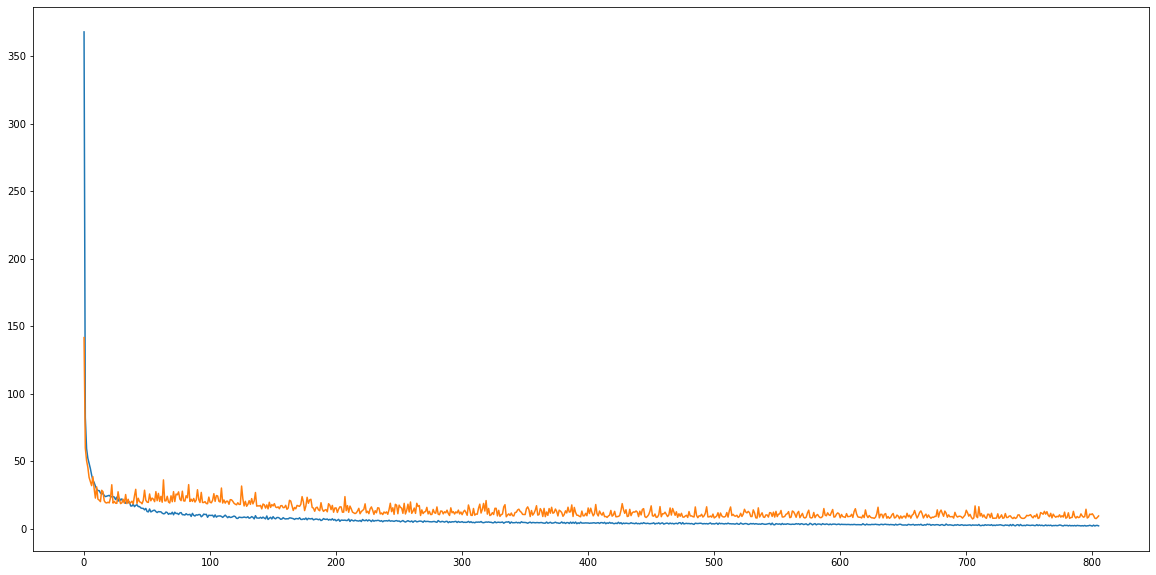

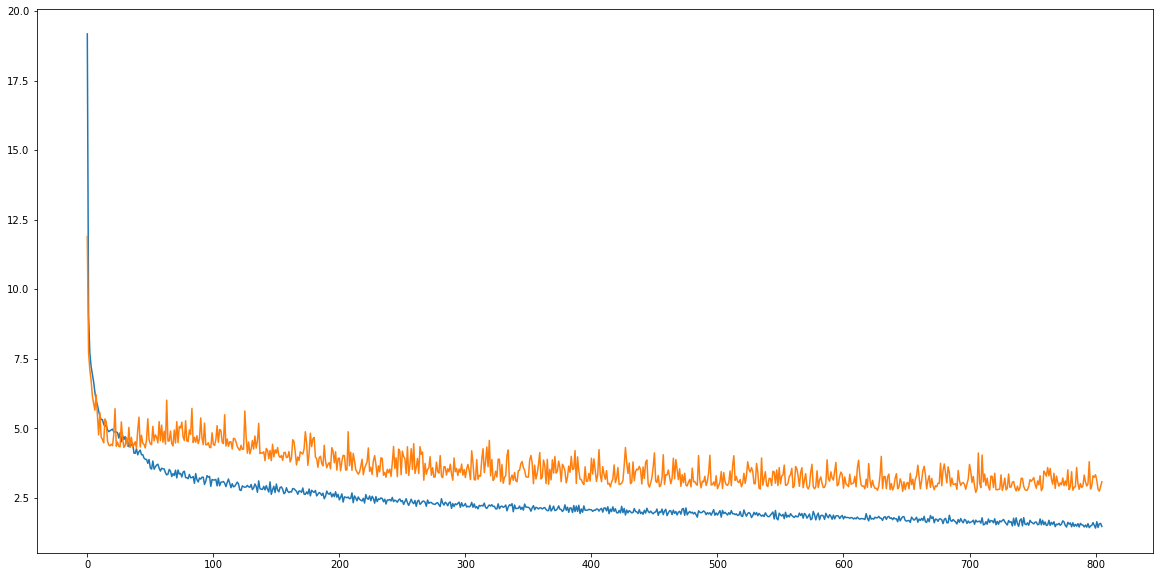

In [222]:
plt.figure(figsize=(20,10))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test');
plt.figure(figsize=(20,10))
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error']);

In [122]:
model.evaluate(x_test_norm, y_test)
# output
# [26.68399990306181, 3.7581424339144838]

4/4 [==============================] - 0s 1ms/step - loss: 20.8955 - root_mean_squared_error: 4.5712


[20.895498275756836, 4.571159362792969]

In [200]:
pred = x_test_norm[:10]

In [201]:
predict = model.predict(pred)
predict

array([[ 7.602209],
       [18.951757],
       [20.143745],
       [27.724897],
       [22.90144 ],
       [21.408237],
       [28.300331],
       [18.809322],
       [17.678493],
       [19.90775 ]], dtype=float32)

In [202]:
y_train[:10]

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4])

In [199]:
model.weights

[<tf.Variable 'dense_132/kernel:0' shape=(13, 100) dtype=float32, numpy=
 array([[ 0.31543896,  0.4273852 , -0.1929495 , ..., -0.38943475,
         -0.30074507, -0.52040946],
        [-0.07380374,  0.02924567, -0.02362964, ...,  0.10315028,
          0.15282492,  0.11037654],
        [-0.25847584,  0.13831991,  0.24251492, ..., -0.06148233,
         -0.03470912, -0.14419356],
        ...,
        [-0.9314564 , -0.05408843,  0.30219623, ...,  0.3374522 ,
          0.8466107 , -0.336998  ],
        [ 0.03192629, -0.01149456,  0.24883504, ...,  0.32956338,
          0.6876854 ,  0.13098589],
        [-0.6418671 , -0.07010584, -0.5443553 , ..., -0.768298  ,
         -0.45494786, -0.32710826]], dtype=float32)>,
 <tf.Variable 'dense_132/bias:0' shape=(100,) dtype=float32, numpy=
 array([-0.06910622, -0.3742177 , -0.25315353, -0.53935933, -0.3782277 ,
        -0.5493948 , -0.5821465 ,  0.10785723, -0.3384486 ,  0.16505383,
        -0.29062766, -0.16070892, -0.00461173, -0.34176227, -0.4247663